### Projeto Guiado: Visualização de Dados Storytelling sobre Taxas de Câmbio

* #### Taxa de câmbio é o preço de uma moeda estrangeira medido em unidades ou frações (centavos) da moeda nacional. Por exemplo, se a taxa de câmbio do dólar é 5,00, significa que um dólar dos Estados Unidos custa R$ 5,00. A taxa de câmbio reflete, assim, o custo de uma moeda em relação à outra.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
exchange_rates = pd.read_csv('euro-daily-hist_1999_2022.csv')

In [24]:
# Primeiros 5 valores
exchange_rates.head(1)


,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [25]:
# Últimos 5 valores
exchange_rates.tail()

,Time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
6530,2024-04-05,1.6461,1.9558,5.4633,1.4702,0.9793,7.8421,NaN,25.286,7.459,...,4.9677,NaN,11.526,1.4608,NaN,NaN,39.743,34.6312,1.0841,20.171
6531,2024-04-08,1.6433,1.9558,5.4806,1.4715,0.9807,7.8282,NaN,25.354,7.4588,...,4.9681,NaN,11.4675,1.4607,NaN,NaN,39.769,34.8481,1.0823,20.1574
6532,2024-04-09,1.6407,1.9558,5.4489,1.4749,0.9819,7.8603,NaN,25.38,7.459,...,4.9682,NaN,11.4555,1.4623,NaN,NaN,39.529,34.9828,1.0867,20.0861
6533,2024-04-10,1.6399,1.9558,5.433,1.4728,0.981,7.8548,NaN,25.368,7.4594,...,4.9690,NaN,11.4345,1.4605,NaN,NaN,39.536,35.0329,1.086,20.0851
6534,2024-04-11,1.6448,1.9558,5.4468,1.4688,0.9787,7.7646,NaN,25.392,7.4604,...,4.9713,NaN,11.531,1.4518,NaN,NaN,39.22,34.6336,1.0729,20.1614


In [19]:
exchange_rates.info()

# Existem 41 colunas (features) e 6535 linhas. 
# Há diversos valores nulos em diferentes colunas
# 37 colunas são do tipo Object, 1 uma coluna é do datetime e por fim, 3 colunas são do tipo float


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      6535 non-null   datetime64[ns]
 1   [Australian dollar ]      6535 non-null   object        
 2   [Bulgarian lev ]          6133 non-null   object        
 3   [Brazilian real ]         6267 non-null   object        
 4   [Canadian dollar ]        6535 non-null   object        
 5   [Swiss franc ]            6535 non-null   object        
 6   [Chinese yuan renminbi ]  6267 non-null   object        
 7   [Cypriot pound ]          2346 non-null   object        
 8   [Czech koruna ]           6535 non-null   object        
 9   [Danish krone ]           6535 non-null   object        
 10  [Estonian kroon ]         3130 non-null   object        
 11  [UK pound sterling ]      6535 non-null   object        
 12  [Greek drachma ]    

In [26]:
# Alterando os nomes de duas colunas 
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar', 'Period\\Unit:': 'Time'}, inplace=True)

# Alterando o tipo de dados da coluna Time ara o tipo datetime
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])

# Classificando os valores do menor para o maior
exchange_rates.sort_values('Time', inplace=True)

# Redefinindo o index
exchange_rates.reset_index(drop=True, inplace=True)

exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6535 entries, 0 to 6534
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Time                      6535 non-null   datetime64[ns]
 1   [Australian dollar ]      6535 non-null   object        
 2   [Bulgarian lev ]          6133 non-null   object        
 3   [Brazilian real ]         6267 non-null   object        
 4   [Canadian dollar ]        6535 non-null   object        
 5   [Swiss franc ]            6535 non-null   object        
 6   [Chinese yuan renminbi ]  6267 non-null   object        
 7   [Cypriot pound ]          2346 non-null   object        
 8   [Czech koruna ]           6535 non-null   object        
 9   [Danish krone ]           6535 non-null   object        
 10  [Estonian kroon ]         3130 non-null   object        
 11  [UK pound sterling ]      6535 non-null   object        
 12  [Greek drachma ]    

In [40]:
# Copiando os valores de duas colunas e salvando em euro_to_dollar
euro_to_dollar = exchange_rates[['Time', 'US_dollar']].copy()

# Existem campos em US_dollar que estão com valores de - (hífen) - REMOVER ESSES VALORES
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

# Convertendo os valores da US_dolar para float
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

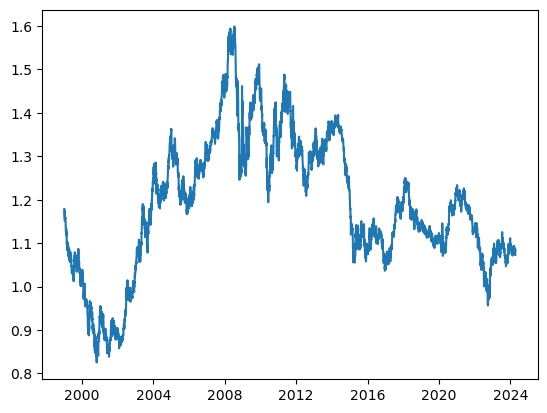

In [41]:
# Série temporal levando em consideração o tempo (data) e o respectivo valor do dólar em relação ao Euro.
plt.plot(euro_to_dollar['Time'], euro_to_dollar['US_dollar'])
plt.show()

In [43]:
# Entendo o conceito de média móvel
values = pd.DataFrame()
values['daily_values'] = pd.Series(range(1,20,2))

# Usando rolling para calcular a média móvel
values['rolling_mean_2'] = values['daily_values'].rolling(2).mean()


,daily_values,rolling_mean_2
0,1,NaN
1,3,2.0
2,5,4.0
3,7,6.0
4,9,8.0
5,11,10.0
6,13,12.0
7,15,14.0
8,17,16.0
9,19,18.0
